## 1. sklearn.datasets: Caricamento e Generazione di Dataset

### Esercizio 1.1 (Base): Esplorazione Dataset Integrati
Carica il dataset Wine e analizza le sue caratteristiche principali.

In [1]:
# Esercizio 1.1: Carica il dataset Wine e rispondi alle seguenti domande:
# 1. Quanti campioni e feature contiene?
# 2. Quante classi ci sono?
# 3. Quali sono i nomi delle feature?
# 4. Visualizza le prime 3 righe dei dati


### Esercizio 1.2 (Intermedio): Generazione Dataset Personalizzato
Crea un dataset sintetico per un problema di classificazione con specifiche caratteristiche.

In [2]:
# Esercizio 1.2: Genera un dataset di classificazione con:
# - 500 campioni
# - 8 feature totali (4 informative, 2 ridondanti)
# - 3 classi
# - 2 cluster per classe
# Poi visualizza le statistiche di base del dataset creato

### Esercizio 1.3 (Avanzato): Confronto Dataset Reali vs Sintetici
Confronta le caratteristiche del dataset Diabetes con un dataset sintetico di regressione.

In [3]:
# Esercizio 1.3: 
# 1. Carica il dataset Diabetes
# 2. Crea un dataset sintetico di regressione con le stesse dimensioni
# 3. Confronta le statistiche (media, std, range) delle feature

## 2. sklearn.preprocessing: Preprocessing dei Dati

### Esercizio 2.1 (Base): Scalatura Dati
Applica diverse tecniche di scalatura sui dati del Wine dataset.

In [4]:
# Esercizio 2.1: Applica StandardScaler e MinMaxScaler al dataset Wine
# Confronta i risultati mostrando media e deviazione standard prima e dopo

### Esercizio 2.2 (Intermedio): Gestione Dati Mancanti
Crea e gestisci un dataset con valori mancanti usando diverse strategie di imputazione.

In [5]:
# Esercizio 2.2: 
# 1. Crea un array con valori mancanti (NaN) in posizioni casuali
# 2. Applica SimpleImputer con strategie: 'mean', 'median', 'most_frequent'
# 3. Confronta i risultati

## 3. sklearn.model_selection: Suddivisione Dati e Validazione

### Esercizio 3.1 (Base): Suddivisione Dati
Pratica la suddivisione dei dati con diverse proporzioni e analizza l'impatto.

In [6]:
# Esercizio 3.1: Usa il dataset Iris per sperimentare diverse suddivisioni
# Testa: 80-20, 70-30, 60-40 e osserva come cambia la distribuzione delle classi

### Esercizio 3.2 (Intermedio): Validazione Incrociata
Implementa diverse strategie di cross-validation e confronta i risultati.

In [7]:
# Esercizio 3.2: Applica cross-validation con diversi fold (3, 5, 10) 
# su un classificatore SVM usando il dataset Wine
# Confronta accuracy media e deviazione standard

### Esercizio 3.3 (Avanzato): Ottimizzazione Iperparametri
Confronta GridSearchCV e RandomizedSearchCV per ottimizzare un Random Forest.

In [ ]:
# Esercizio 3.3: Ottimizza un Random Forest usando entrambi i metodi
# Confronta tempi di esecuzione e risultati ottenuti (best_params, best_score)



---

## 4. sklearn.decomposition: Riduzione Dimensionalità

### Esercizio 4.1 (Base): PCA Base
Applica PCA per ridurre la dimensionalità e visualizza la varianza spiegata.

In [ ]:
# Esercizio 4.1: Applica PCA al dataset Digits
# 1. Riduci da 64 a 10 componenti
# 2. Visualizza la varianza spiegata cumulativa
# 3. Determina quante componenti servono per spiegare il 95% della varianza


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


In [ ]:
# Caricamento dati
digits = load_digits()
X = digits.data  # 64 features


(1797, 64)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)

print("Varianza spiegata:", pca_10.explained_variance_ratio_)
print("Varianza cumulativa:", np.cumsum(pca_10.explained_variance_ratio_))


Varianza spiegata (10 componenti): [0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003]
Varianza cumulativa (10): [0.12033916 0.21594971 0.30039385 0.36537793 0.41397948 0.45612068
 0.49554151 0.52943532 0.55941753 0.58873755]


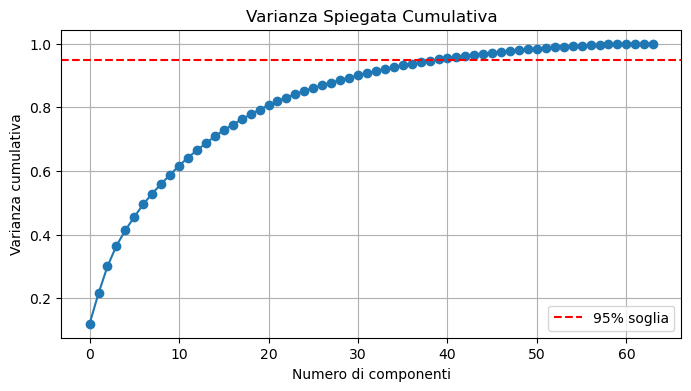

In [7]:
pca_full = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% soglia')
plt.title('Varianza Spiegata Cumulativa')
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza cumulativa')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
# Trova il numero minimo di componenti che spiegano almeno il 95% della varianza
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Componenti necessarie per spiegare il 95% della varianza: {num_components_95}")


Componenti necessarie per spiegare il 95% della varianza: 40


### Esercizio 4.2 (Intermedio): Confronto Tecniche di Decomposizione
Confronta PCA, ICA e NMF sullo stesso dataset.

In [13]:
from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.preprocessing import MinMaxScaler


In [17]:

# Normalizza per NMF
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
# Inizializza modelli con 10 componenti
pca = PCA(n_components=10, random_state=0)
ica = FastICA(n_components=10, random_state=0)
nmf = NMF(n_components=10, init='random', random_state=0)


In [19]:
# Applica decomposizione e ricostruzione
X_pca = pca.inverse_transform(pca.fit_transform(X_scaled))
X_ica = ica.inverse_transform(ica.fit_transform(X_scaled))
X_nmf = nmf.inverse_transform(nmf.fit_transform(X_scaled))


c:\Users\lauda\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


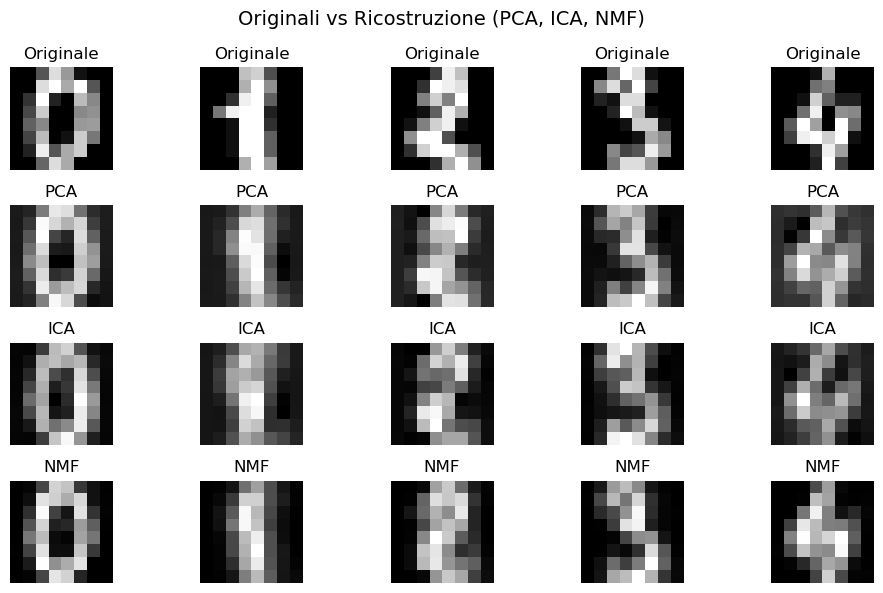

In [22]:
# Mostra immagini originali e ricostruite
fig, axes = plt.subplots(4, 5, figsize=(10, 6))
fig.suptitle("Originali vs Ricostruzione (PCA, ICA, NMF)", fontsize=14)


# Seleziona 5 immagini da visualizzare
for i in range(5):
    axes[0, i].imshow(X_scaled[i].reshape(8, 8), cmap='gray')
    axes[0, i].set_title("Originale")
    axes[1, i].imshow(X_pca[i].reshape(8, 8), cmap='gray')
    axes[1, i].set_title("PCA")
    axes[2, i].imshow(X_ica[i].reshape(8, 8), cmap='gray')
    axes[2, i].set_title("ICA")
    axes[3, i].imshow(X_nmf[i].reshape(8, 8), cmap='gray')
    axes[3, i].set_title("NMF")

# Rimuove gli assi
for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Esercizio 4.2: Confronta PCA, FastICA e NMF sul dataset Olivetti Faces
# Usa 10 componenti per tutti e confronta la ricostruzione

In [23]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA, FastICA, NMF
import matplotlib.pyplot as plt
import numpy as np


In [24]:
# Carica dataset Olivetti Faces
faces = fetch_olivetti_faces()
X = faces.data


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\lauda\scikit_learn_data


In [25]:
# Modelli con 10 componenti
pca = PCA(n_components=10, random_state=0)
ica = FastICA(n_components=10, random_state=0, max_iter=1000)
nmf = NMF(n_components=10, init='random', random_state=0, max_iter=1000)



In [26]:
# Applica decomposizione e ricostruzione
X_pca = pca.inverse_transform(pca.fit_transform(X))
X_ica = ica.inverse_transform(ica.fit_transform(X))
X_nmf = nmf.inverse_transform(nmf.fit_transform(X))



c:\Users\lauda\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


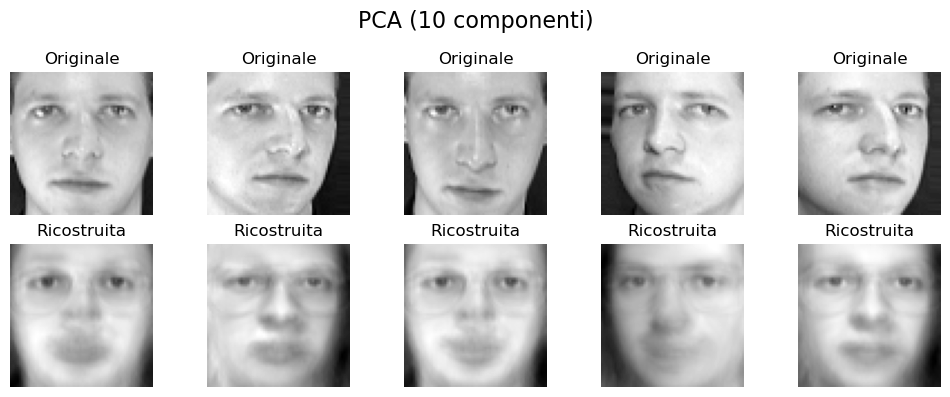

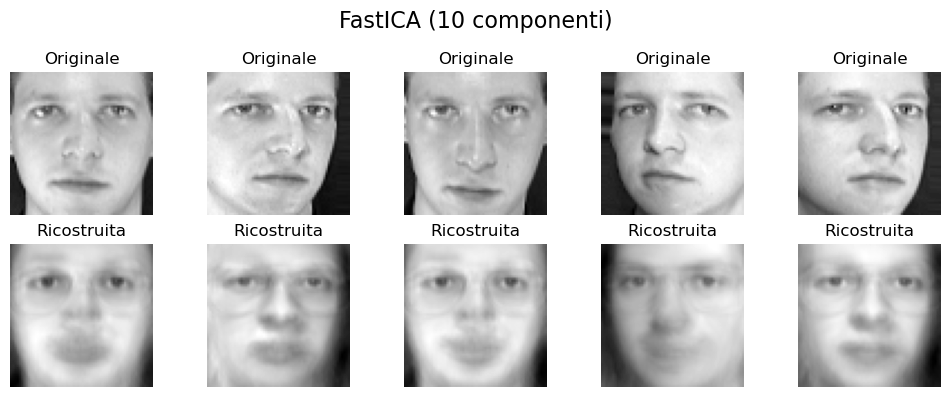

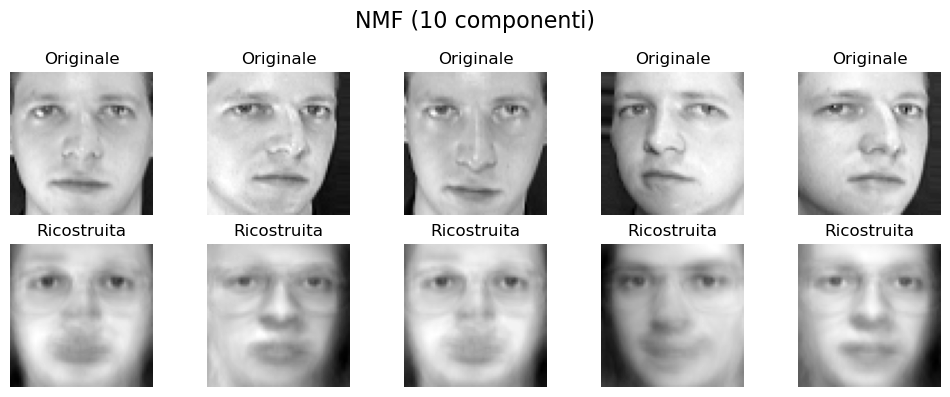

In [27]:
# Funzione per mostrare immagini
def plot_faces(original, recon, title, n_images=5):
    fig, axes = plt.subplots(2, n_images, figsize=(n_images * 2, 4))
    fig.suptitle(title, fontsize=16)
    for i in range(n_images):
        axes[0, i].imshow(original[i].reshape(64, 64), cmap='gray')
        axes[0, i].set_title("Originale")
        axes[1, i].imshow(recon[i].reshape(64, 64), cmap='gray')
        axes[1, i].set_title("Ricostruita")
        for ax in axes[:, i]:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizza le ricostruzioni
plot_faces(X, X_pca, "PCA (10 componenti)")
plot_faces(X, X_ica, "FastICA (10 componenti)")
plot_faces(X, X_nmf, "NMF (10 componenti)")


### Esercizio 4.3 (Avanzato): Dimensionalità Ottimale
Determina la dimensionalità ottimale usando validazione incrociata.

In [ ]:
# Esercizio 4.3: Trova il numero ottimale di componenti PCA
# utilizzando un classificatore e cross-validation sul dataset Wine

In [29]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [30]:
# Carica dataset Wine
X, y = load_wine(return_X_y=True)

# Lista di componenti da testare
componenti = list(range(1, X.shape[1] + 1))  # da 1 a 13

scores = []


In [31]:
# Per ogni numero di componenti
for n in componenti:
    # Applica PCA con n componenti
    X_pca = PCA(n_components=n).fit_transform(X)
    # Valuta con cross-validation un modello logistico
    score = cross_val_score(LogisticRegression(max_iter=1000), X_pca, y, cv=5).mean()
    scores.append(score)

# Trova miglior numero di componenti
miglior_n = componenti[scores.index(max(scores))]

print(f"Miglior numero di componenti: {miglior_n}")
print(f"Accuratezza media CV: {scores[miglior_n-1]:.3f}")


Miglior numero di componenti: 7
Accuratezza media CV: 0.961


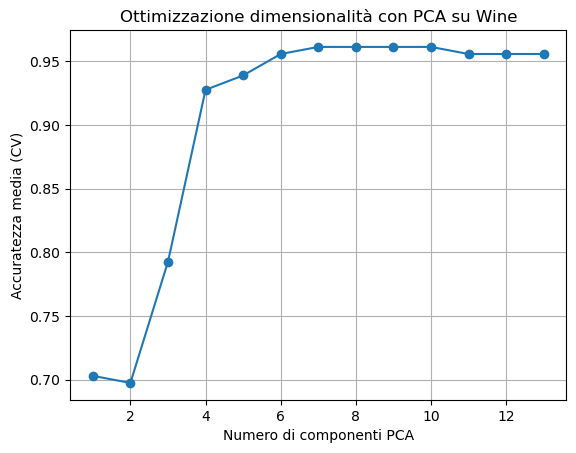

In [32]:
# Grafico risultati
plt.plot(componenti, scores, marker='o')
plt.xlabel('Numero di componenti PCA')
plt.ylabel('Accuratezza media (CV)')
plt.title('Ottimizzazione dimensionalità con PCA su Wine')
plt.grid(True)
plt.show()
